## ***INITIAL DATASET UPLOAD AND SETUP***

In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving smalldataset.zip to smalldataset.zip


In [ ]:
import zipfile
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split

# 1️⃣ Extract Dataset
zip_path = "/content/smalldataset.zip"  # To Change name if needed
extract_path = "/content/smalldataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

dataset_path = extract_path
print(f"Files extracted to: {extract_path}")


Files extracted to: /content/smalldataset


TRAIN - TEST SPLIT

In [ ]:
# 2️⃣ Load Images into X (Features) and y (Labels)
image_size = (224, 224)  # Resize images to 224x224
X, y = [], []

# Define class labels
class_labels = {"benign": 0, "malignant": 1}

# Loop through dataset
for class_name, class_index in class_labels.items():
    class_path = os.path.join(dataset_path, class_name)

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.resize(img, image_size)
        X.append(img)
        y.append(class_index)

# Convert to NumPy arrays
X = np.array(X) / 255.0  # Normalize images
y = np.array(y)

print(f"Total images loaded: {len(X)}")
print(f"Class distribution: {np.bincount(y)}")  # Check balance

# 3️⃣ Split into Train (80%), Validation (10%), Test (10%)
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.10, random_state=42, stratify=y)

# 🛠️ FIX: Correct stratification in second split
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1111, random_state=42, stratify=y_trainval)

print(f"Train set: {len(X_train)} images ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation set: {len(X_val)} images ({len(X_val)/len(X)*100:.1f}%)")
print(f"Test set: {len(X_test)} images ({len(X_test)/len(X)*100:.1f}%)")

Total images loaded: 410
Class distribution: [205 205]
Train set: 328 images (80.0%)
Validation set: 41 images (10.0%)
Test set: 41 images (10.0%)


ENSURE BALANCED DATASET

In [ ]:
# check class distribution
def check_balance(y_split, split_name):
    unique, counts = np.unique(y_split, return_counts=True)
    balance = {int(k): int(v) for k, v in zip(unique, counts)}  # Convert np.int64 → int
    print(f"{split_name} class distribution:", balance)


check_balance(y_train, "Train")
check_balance(y_val, "Validation")
check_balance(y_test, "Test")


Train class distribution: {0: 164, 1: 164}
Validation class distribution: {0: 20, 1: 21}
Test class distribution: {0: 21, 1: 20}


SUBFOLDER STRUCTURE INTEGRITY

In [ ]:
""" CHECK IF SUBFOLDERS HAVE CORRECT FORM
import os

# Έλεγχος των υποφακέλων του dataset
for subdir, dirs, files in os.walk(extract_path):
    print(f"Subfolder: {subdir}")
    print(f"Files: {files}")
-------------------------------------------------------------

CORRECT FORM:

/content/smalldataset/
    benign/
        image1.jpg
        image2.jpg
        ...
    malignant/
        image1.jpg
        image2.jpg
        ...

"""

' CHECK IF SUBFOLDERS HAVE CORRECT FORM\nimport os\n\n# Έλεγχος των υποφακέλων του dataset\nfor subdir, dirs, files in os.walk(extract_path):\n    print(f"Subfolder: {subdir}")\n    print(f"Files: {files}")\n-------------------------------------------------------------\n\nCORRECT FORM:\n\n/content/smalldataset/\n    benign/\n        image1.jpg\n        image2.jpg\n        ...\n    malignant/\n        image1.jpg\n        image2.jpg\n        ...\n\n'

# ***Chapter 1: Data Preprocessing & Exploration***

View 5 Images of each Class

In [ ]:
import matplotlib.pyplot as plt
import os
import numpy as np

def display_images(dataset_split):
    # Choose the correct dataset based on input
    if dataset_split == 'train':
        X_data, y_data = X_train, y_train
        benign_indices = [i for i in range(len(y_train)) if y_train[i] == 0]
        malignant_indices = [i for i in range(len(y_train)) if y_train[i] == 1]
        benign_images = X_train[benign_indices[:5]]
        malignant_images = X_train[malignant_indices[:5]]
        benign_filenames = [os.path.basename(img_name) for img_name in np.array(os.listdir(os.path.join(dataset_path, 'benign')))[benign_indices[:5]]]
        malignant_filenames = [os.path.basename(img_name) for img_name in np.array(os.listdir(os.path.join(dataset_path, 'malignant')))[malignant_indices[:5]]]
    elif dataset_split == 'validation':
        X_data, y_data = X_val, y_val
        benign_indices = [i for i in range(len(y_val)) if y_val[i] == 0]
        malignant_indices = [i for i in range(len(y_val)) if y_val[i] == 1]
        benign_images = X_val[benign_indices[:5]]
        malignant_images = X_val[malignant_indices[:5]]
        benign_filenames = [os.path.basename(img_name) for img_name in np.array(os.listdir(os.path.join(dataset_path, 'benign')))[benign_indices[:5]]]
        malignant_filenames = [os.path.basename(img_name) for img_name in np.array(os.listdir(os.path.join(dataset_path, 'malignant')))[malignant_indices[:5]]]
    elif dataset_split == 'test':
        X_data, y_data = X_test, y_test
        benign_indices = [i for i in range(len(y_test)) if y_test[i] == 0]
        malignant_indices = [i for i in range(len(y_test)) if y_test[i] == 1]
        benign_images = X_test[benign_indices[:5]]
        malignant_images = X_test[malignant_indices[:5]]
        benign_filenames = [os.path.basename(img_name) for img_name in np.array(os.listdir(os.path.join(dataset_path, 'benign')))[benign_indices[:5]]]
        malignant_filenames = [os.path.basename(img_name) for img_name in np.array(os.listdir(os.path.join(dataset_path, 'malignant')))[malignant_indices[:5]]]
    else:
        print("Invalid dataset split. Please choose 'train', 'validation', or 'test'.")
        return

    # Plot the images
    plt.figure(figsize=(12, 6))  # Set figure size for better visualization

    # Plot benign images
    for i, (benign_img, benign_filename) in enumerate(zip(benign_images, benign_filenames)):
        plt.subplot(2, 5, i+1)  # Plot in the first row for benign images
        plt.imshow(benign_img)
        plt.axis('off')
        plt.title(f"{benign_filename}", fontsize=10)  # Only show the filename on the image

    # Plot malignant images
    for i, (malignant_img, malignant_filename) in enumerate(zip(malignant_images, malignant_filenames)):
        plt.subplot(2, 5, i+6)  # Plot in the second row for malignant images
        plt.imshow(malignant_img)
        plt.axis('off')
        plt.title(f"{malignant_filename}", fontsize=10)  # Only show the filename on the image

    # Set the title for the entire figure
    plt.suptitle(f"{dataset_split.capitalize()} Set: Benign and Malignant Images", fontsize=16, y=1.05)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.subplots_adjust(top=0.85)  # Adjust space for the title
    plt.show()



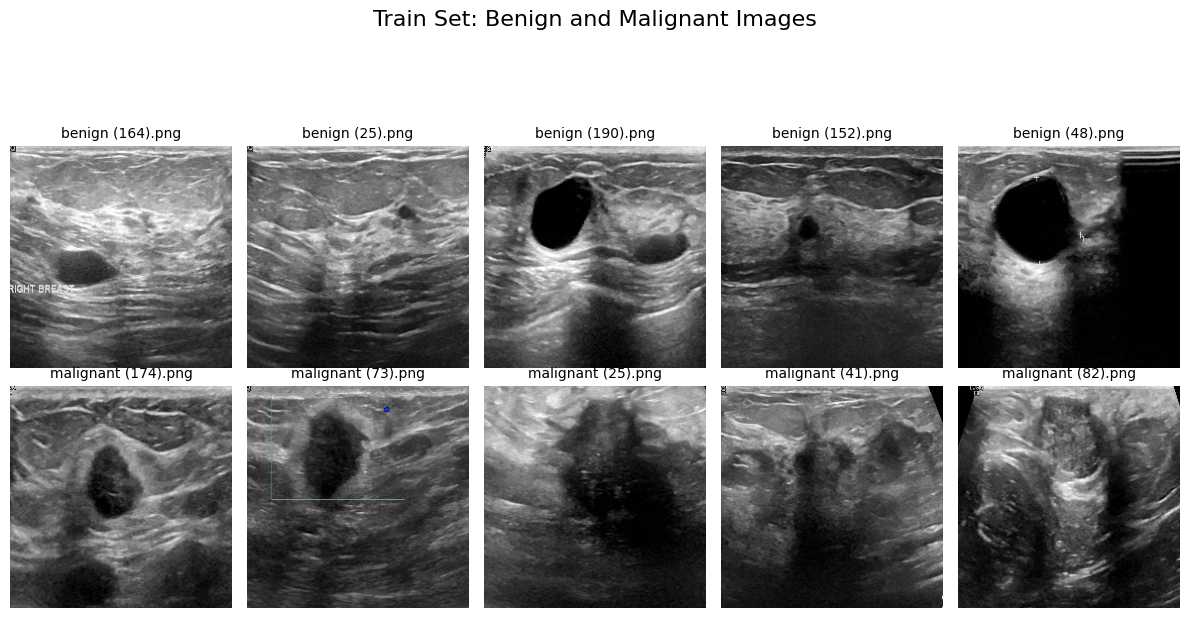

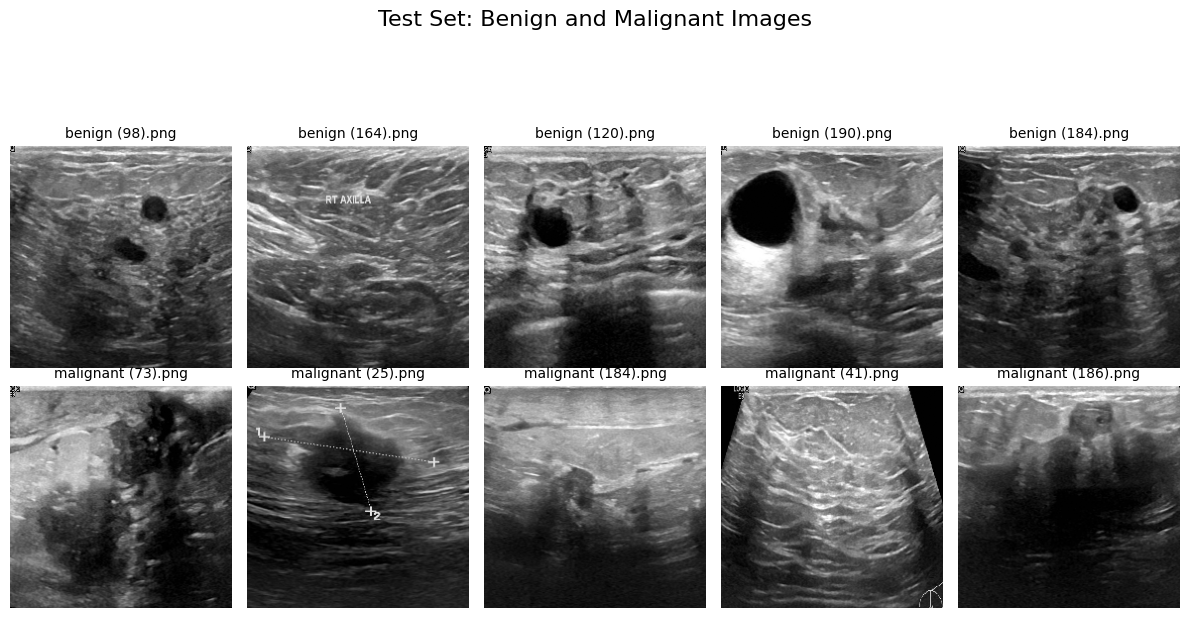

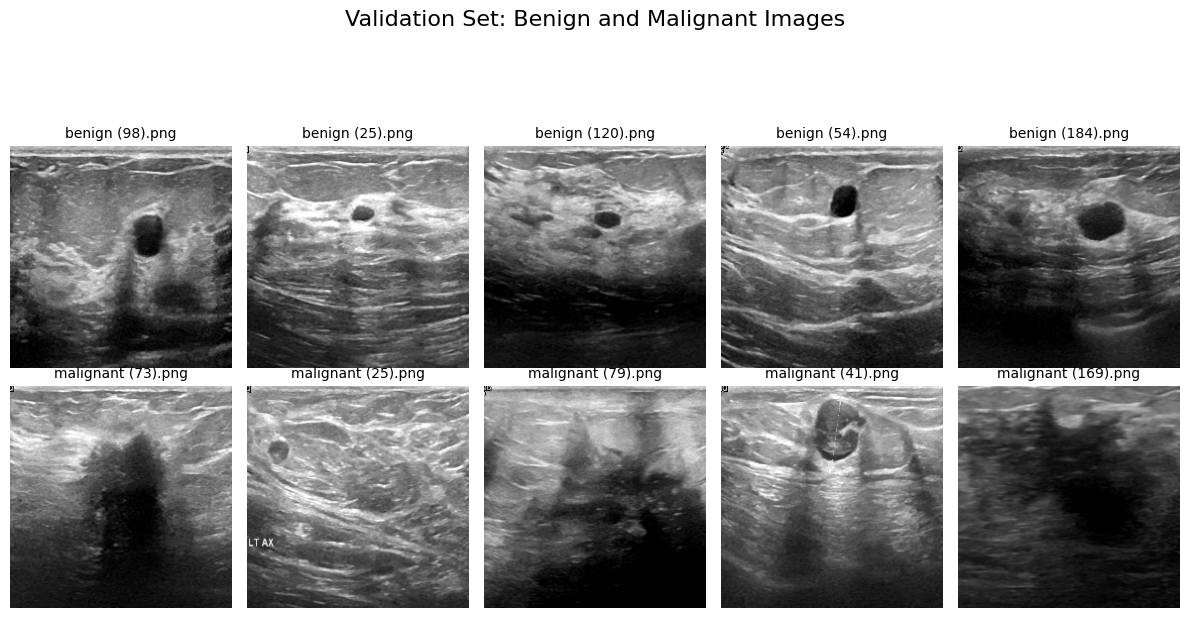

In [ ]:
display_images('train')
display_images('test')
display_images('validation')

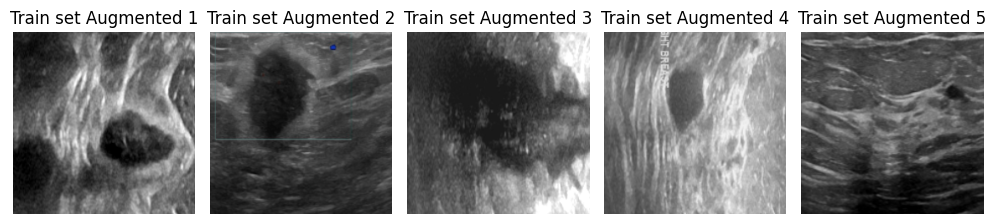

In [ ]:
import numpy as np
import cv2
import tensorflow as tf
import random
import matplotlib.pyplot as plt

# Define augmentation functions:
def random_flip(image):
    return tf.image.random_flip_left_right(image)

def random_rotation(image, max_angle=40):
    angle = random.uniform(-max_angle, max_angle)
    return tf.image.rot90(image, k=int(angle // 90))  # Rotate image by 90, 180, or 270 degrees

def random_zoom(image, zoom_factor=0.2):
    height, width, _ = image.shape
    zoomed = tf.image.resize(image, (int(height * (1 + zoom_factor)), int(width * (1 + zoom_factor))))
    return zoomed

def random_shift(image, shift_range=0.2):
    height, width, _ = image.shape
    shift_height = int(shift_range * height)
    shift_width = int(shift_range * width)
    shifted_image = tf.image.random_crop(image, size=[height - shift_height, width - shift_width, 3])
    return shifted_image

def random_brightness(image):
    return tf.image.random_brightness(image, max_delta=0.2)

def random_contrast(image):
    return tf.image.random_contrast(image, lower=0.7, upper=1.3)

# Combine augmentations
def augment_image(image):
    image = random_flip(image)
    image = random_rotation(image)
    image = random_zoom(image)
    image = random_shift(image)
    image = random_brightness(image)
    image = random_contrast(image)

    # Clip the image to ensure it's within [0, 1] range
    image = tf.clip_by_value(image, 0.0, 1.0)

    return image

# Show some augmented images
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    augmented_img = augment_image(X_train[i])  # Augment the first 5 training images
    plt.imshow(augmented_img)
    plt.axis('off')
    plt.title(f"Train set Augmented {i+1}")

plt.tight_layout()
plt.show()

# Optionally, you can apply augmentation to the entire training set
X_train_augmented = np.array([augment_image(img) for img in X_train])

Heatmap Μέσης Εικόνας για Κάθε Κατηγορία

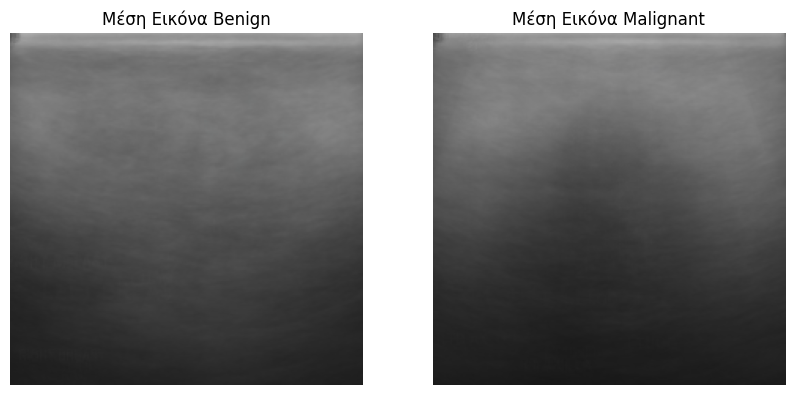

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Διαχωρισμός benign & malignant
benign_images = X_train[y_train == 0]
malignant_images = X_train[y_train == 1]

# Υπολογισμός μέσης εικόνας
mean_benign = np.mean(benign_images, axis=0)
mean_malignant = np.mean(malignant_images, axis=0)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(mean_benign)
axes[0].set_title("Μέση Εικόνα Benign")
axes[0].axis("off")

axes[1].imshow(mean_malignant)
axes[1].set_title("Μέση Εικόνα Malignant")
axes[1].axis("off")

plt.show()


Histogram Κατανομής των Pixel Values

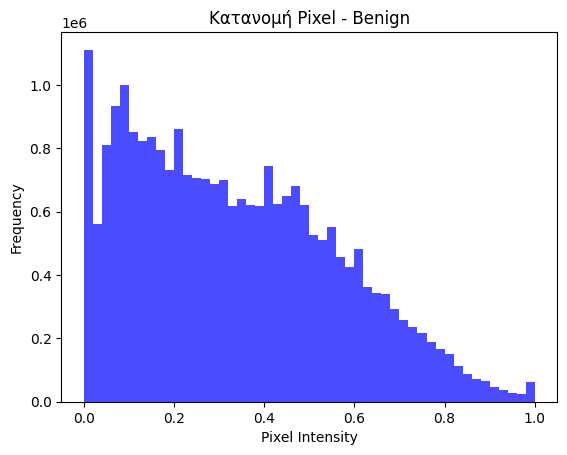

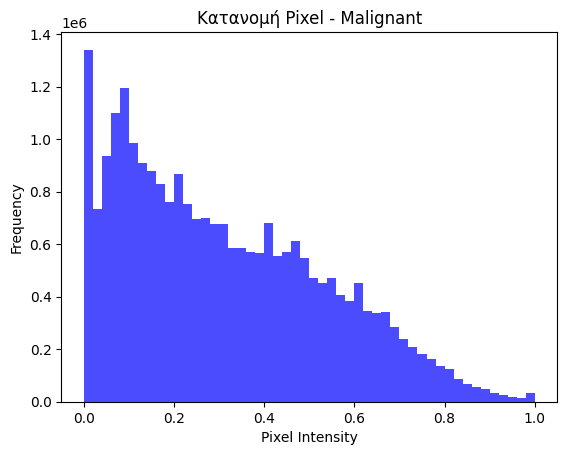

This way we can check if there is an obvious difference in brightness levels for our classes.


In [ ]:
import matplotlib.pyplot as plt

def plot_pixel_distribution(images, title):
    pixels = images.flatten()
    plt.hist(pixels, bins=50, color="blue", alpha=0.7)
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()


plot_pixel_distribution(benign_images, "Κατανομή Pixel - Benign")
plot_pixel_distribution(malignant_images, "Κατανομή Pixel - Malignant")

print("This way we can check if there is an obvious difference in brightness levels for our classes.")


PCA (Principal Component Analysis) Visualization

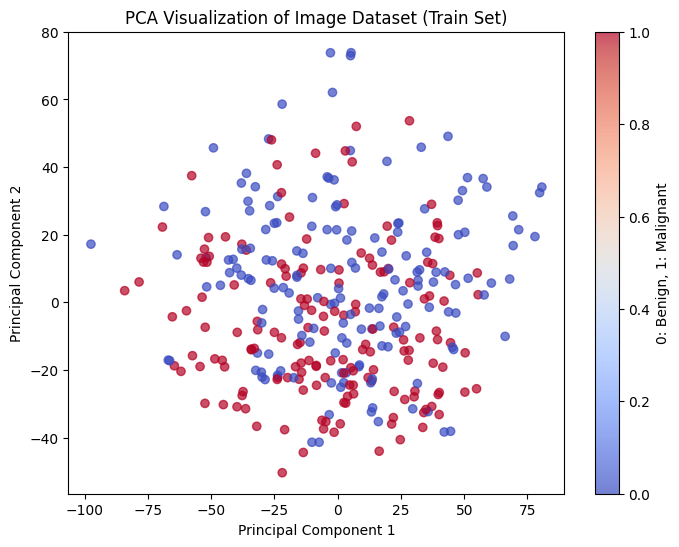

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Flatten training images for PCA
flat_images = X_train.reshape(X_train.shape[0], -1)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(flat_images)


plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y_train, cmap="coolwarm", alpha=0.7)
plt.colorbar(label="0: Benign, 1: Malignant")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Visualization of Image Dataset (Train Set)")
plt.show()


# ***Chapter 2: Models's Architecture Designs***

***Custom CNN 1***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

Model_CNN1 = Sequential([
    # First convolutional block
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3), kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional block
    Conv2D(64, (3, 3), activation="relu", kernel_regularizer=l2(0.00001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    # Third convolutional block
    Conv2D(128, (3, 3), activation="relu", kernel_regularizer=l2(0.00001)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),


    GlobalAveragePooling2D(),# reduce overfitting

    # Fully connected layer
    Dense(128, activation="softmax", kernel_regularizer=l2(0.00001)),
    Dropout(0.5),

    # Output layer
    Dense(1, activation="sigmoid")
])


Model_CNN1.summary()

# εμφάνιση του διαγράμματος
plot_model(Model_CNN1, show_shapes=True, show_layer_names=True, dpi=50, rankdir="LR")  # LR = Left to Right (οριζόντια)

***VGG16 (Older, but simple and reliable)***

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load VGG16 without the top layers
vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers
for layer in vgg16_base.layers:
    layer.trainable = False

#Add custom layers on top of base model
x = Flatten()(vgg16_base.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)  # output layer

#final model
Model_VGG16 = Model(inputs=vgg16_base.input, outputs=x)

# Print the model summary
Model_VGG16.summary()

***ResNet-50***

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load ResNet50 withouttop layers
resnet_base = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze layers
for layer in resnet_base.layers:
    layer.trainable = False

# Add custom layers on top ofbase model
x = Flatten()(resnet_base.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

# Create final model
Model_ResNet50 = Model(inputs=resnet_base.input, outputs=x)


Model_ResNet50.summary()


# ***Chapter 3: Initial Features Assignment***

***CNN 1***

In [ ]:
from tensorflow.keras.optimizers import Adam, AdamW, RMSprop, SGD, Nadam, Adagrad, Adadelta
from tensorflow.keras.optimizers import Adam, AdamW, RMSprop, SGD, Nadam, Adagrad, Adadelta
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau # Import ReduceLROnPlateau

Lr=1e-4
optimizer = Adagrad(learning_rate=0.001)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6)

# Compile the model with a higher learning rate
Model_CNN1.compile(
    optimizer=optimizer,
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


***VGG16***

In [ ]:

Model_VGG16.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",  # Use categorical_crossentropy for multi-class classification
    metrics=["accuracy"]
)

***RES-NET50***

In [ ]:

Model_ResNet50.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ***Chapter 3: Train Models***

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

bs=8
epochs=40
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

Train CNN Model

In [ ]:
# Fit model with callbacks
history_CNN = Model_CNN1.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=bs,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_acc = Model_CNN1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 90ms/step - accuracy: 0.5138 - loss: 0.7004 - val_accuracy: 0.5122 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4849 - loss: 0.7020 - val_accuracy: 0.5122 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5338 - loss: 0.7013 - val_accuracy: 0.5122 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.4815 - loss: 0.7010 - val_accuracy: 0.5122 - val_loss: 0.7009 - learning_rate: 0.0010
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.5112 - loss: 0.7013 - val_accuracy: 0.5122 - val_loss: 0.7009 - learning_rate: 5.0000e-04
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5235 - loss: 0.7005 - val_accuracy: 0.5122 - val_loss: 0.7009 - learning_rate: 5.0000e-04
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5369 - loss: 0.7004 

Train VGG16

In [ ]:
# Train the model with frozen layers
history_vgg16 = Model_VGG16.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=bs,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping]
)


test_loss, test_acc = Model_VGG16.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 127ms/step - accuracy: 0.6899 - loss: 0.5732 - val_accuracy: 0.8049 - val_loss: 0.4183
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.8648 - loss: 0.3190 - val_accuracy: 0.8537 - val_loss: 0.2932
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9094 - loss: 0.2349 - val_accuracy: 0.8537 - val_loss: 0.2805
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9699 - loss: 0.1249 - val_accuracy: 0.8049 - val_loss: 0.3462
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.9886 - loss: 0.1045 - val_accuracy: 0.8293 - val_loss: 0.2892
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9890 - loss: 0.0949 - val_accuracy: 0.8293 - val_loss: 0.4109
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9752 - loss: 0.0868 - val_accuracy: 0.8780 - val_loss: 0.2842
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 1.0000 - loss: 0.0652 - val_accuracy: 0.8293 -

***Train RES-NET50***

In [ ]:
history_RESNET50 = Model_ResNet50.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=bs,
    callbacks=[early_stopping]
)


test_loss, test_acc = Model_ResNet50.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 232ms/step - accuracy: 0.5129 - loss: 1.4797 - val_accuracy: 0.4878 - val_loss: 0.8860
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.5461 - loss: 0.7264 - val_accuracy: 0.5122 - val_loss: 0.9127
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6159 - loss: 0.6869 - val_accuracy: 0.6341 - val_loss: 0.5837
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6024 - loss: 0.6827 - val_accuracy: 0.7317 - val_loss: 0.5428
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.7075 - loss: 0.5876 - val_accuracy: 0.8049 - val_loss: 0.5128
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7258 - loss: 0.5491 - val_accuracy: 0.7805 - val_loss: 0.5563
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.5739 - loss: 0.7338 - val_accuracy: 0.8049 - val_loss: 0.5537
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - accuracy: 0.7684 - loss: 0.5441 - val_accuracy: 0.7561 -

# ***Chapter 4: Evaluate Models***

Evaluate CNN Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 479ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      benign       0.00      0.00      0.00        20
   malignant       0.51      1.00      0.68        21

    accuracy                           0.51        41
   macro avg       0.26      0.50      0.34        41
weighted avg       0.26      0.51      0.35        41



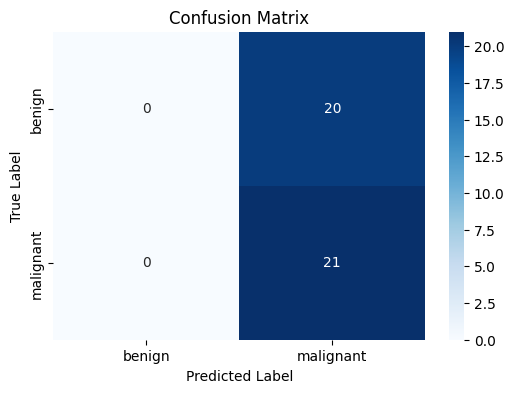

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# Predict on validation data
pred_probs = Model_CNN1.predict(X_val)
pred_labels = (pred_probs > 0.5).astype(int).flatten()  # for binary classification

# True labels
true_labels = y_val.flatten()


# Classification report
print(classification_report(true_labels, pred_labels, target_names=class_labels))

# Confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Visualize CNN Training Progress

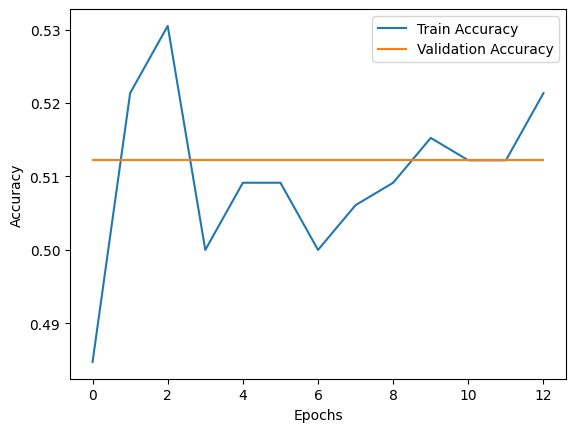

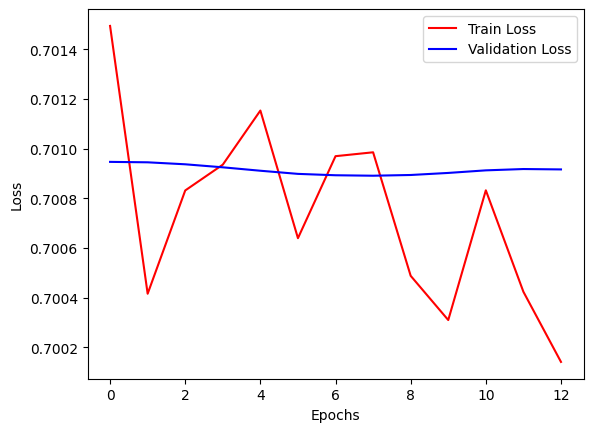

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_CNN.history['accuracy'], label='Train Accuracy')
plt.plot(history_CNN.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_CNN.history['loss'], label='Train Loss', color='red')
plt.plot(history_CNN.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Evaluate VGG16 Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 821ms/step
              precision    recall  f1-score   support

      benign       0.82      0.90      0.86        20
   malignant       0.89      0.81      0.85        21

    accuracy                           0.85        41
   macro avg       0.86      0.85      0.85        41
weighted avg       0.86      0.85      0.85        41



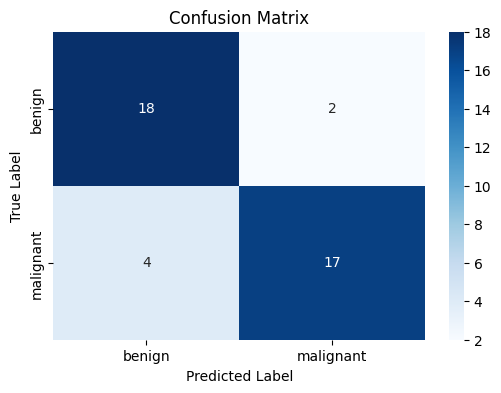

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix


pred_probs = Model_VGG16.predict(X_val)
pred_labels = (pred_probs > 0.5).astype(int).flatten()


true_labels = y_val.flatten()


print(classification_report(true_labels, pred_labels, target_names=class_labels))


cm = confusion_matrix(true_labels, pred_labels)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Visualize VGG16 Training Progress

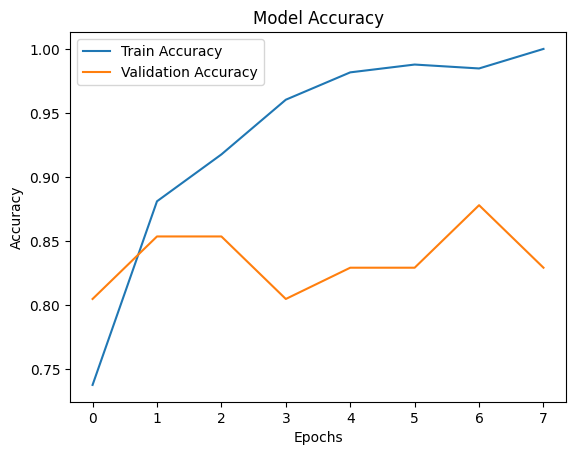

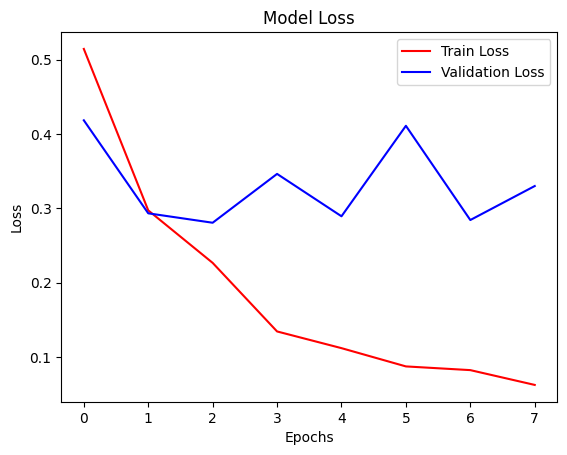

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_vgg16.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history_vgg16.history['loss'], label='Train Loss', color='red')
plt.plot(history_vgg16.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


Evaluate RES-NET50 Model

1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step
              precision    recall  f1-score   support

      benign       0.80      0.80      0.80        20
   malignant       0.81      0.81      0.81        21

    accuracy                           0.80        41
   macro avg       0.80      0.80      0.80        41
weighted avg       0.80      0.80      0.80        41



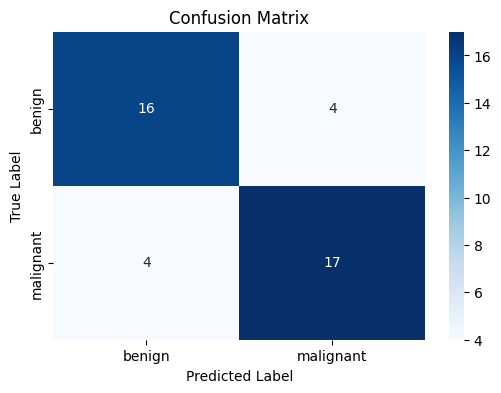

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

pred_probs = Model_ResNet50.predict(X_val)
pred_labels = (pred_probs > 0.5).astype(int).flatten()  # for binary classification

true_labels = y_val.flatten()

print(classification_report(true_labels, pred_labels, target_names=class_labels))

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Visualize RES-NET50 Training Progress

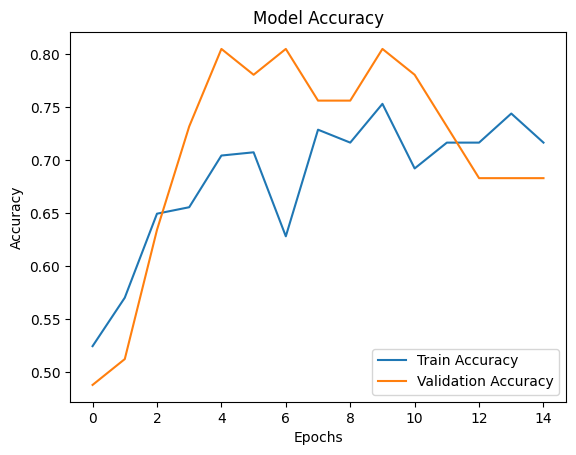

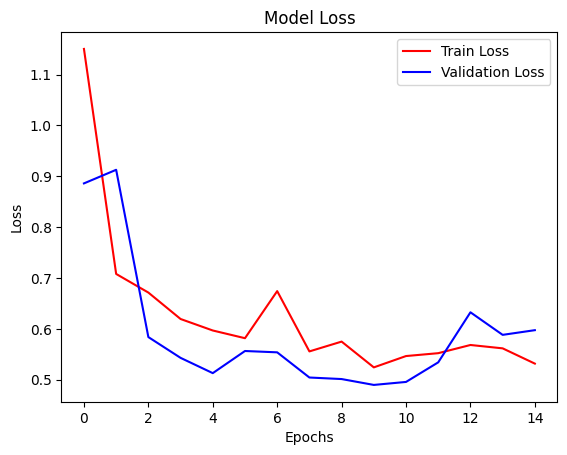

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_RESNET50.history['accuracy'], label='Train Accuracy')
plt.plot(history_RESNET50.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history_RESNET50.history['loss'], label='Train Loss', color='red')
plt.plot(history_RESNET50.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


# ***K-Fold***

CNN KFOLD

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras import backend as K

k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):


    # Clear the session
    K.clear_session()
    print(f"\nFold {fold+1}/{k}")

    # Split data for current fold
    X_train_kfold, X_val_kfold = X[train_idx], X[val_idx]
    y_train_kfold, y_val_kfold = y[train_idx], y[val_idx]

    # Train on current fold
    Model_CNN1.fit(
        X_train_kfold, y_train_kfold,
        validation_data=(X_val_kfold, y_val_kfold),
        epochs=10, batch_size=bs, verbose=1
    )

    # Get Training Accuracy
    train_loss, train_acc = Model_CNN1.evaluate(X_train_kfold, y_train_kfold, verbose=0)
    # Get Validation Accuracy
    val_loss, val_acc = Model_CNN1.evaluate(X_val_kfold, y_val_kfold, verbose=0)

    print(f"Fold {fold+1} Train Accuracy: {train_acc:.4f}")
    print(f"Fold {fold+1} Validation Accuracy: {val_acc:.4f}")

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Compute & Print Mean Accuracy
mean_train_acc = np.mean(train_accuracies)
mean_val_acc = np.mean(val_accuracies)

print(f"\nFinal Mean Train Accuracy: {mean_train_acc:.4f}")
print(f"Final Mean Validation Accuracy: {mean_val_acc:.4f}")



Fold 1/3
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.5699 - loss: 0.6990 - val_accuracy: 0.4599 - val_loss: 0.7021
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5768 - loss: 0.6988 - val_accuracy: 0.4599 - val_loss: 0.7021
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5338 - loss: 0.7006 - val_accuracy: 0.4599 - val_loss: 0.7021
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5063 - loss: 0.7003 - val_accuracy: 0.4599 - val_loss: 0.7022
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4913 - loss: 0.7014 - val_accuracy: 0.4599 - val_loss: 0.7022
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5179 - loss: 0.7006 - val_accuracy: 0.4599 - val_loss: 0.7022
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4923 - loss: 0.7013 - val_accuracy: 0.4599 - val_loss: 0.7022
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.4810 - loss: 0.7020 - val_accuracy

VGG16 KFOLD

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras import backend as K

k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):

    K.clear_session()
    print(f"\nFold {fold+1}/{k}...")

    X_train_kfold, X_val_kfold = X[train_idx], X[val_idx]
    y_train_kfold, y_val_kfold = y[train_idx], y[val_idx]

    Model_VGG16.fit(
        X_train_kfold, y_train_kfold,
        validation_data=(X_val_kfold, y_val_kfold),
        epochs=10, batch_size=bs, verbose=1
    )

    train_loss, train_acc = Model_VGG16.evaluate(X_train_kfold, y_train_kfold, verbose=0)

    val_loss, val_acc = Model_VGG16.evaluate(X_val_kfold, y_val_kfold, verbose=0)

    print(f"Fold {fold+1} Train Accuracy: {train_acc:.4f}")
    print(f"Fold {fold+1} Validation Accuracy: {val_acc:.4f}")

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

mean_train_acc = np.mean(train_accuracies)
mean_val_acc = np.mean(val_accuracies)

print(f"\nFinal Mean Train Accuracy: {mean_train_acc:.4f}")
print(f"Final Mean Validation Accuracy: {mean_val_acc:.4f}")



Fold 1/3...
Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.9386 - loss: 0.2124 - val_accuracy: 0.8248 - val_loss: 0.3200
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.8816 - loss: 0.2212 - val_accuracy: 0.9051 - val_loss: 0.2007
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - accuracy: 0.9489 - loss: 0.1375 - val_accuracy: 0.9051 - val_loss: 0.1707
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9716 - loss: 0.0725 - val_accuracy: 0.9343 - val_loss: 0.1732
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step - accuracy: 0.9895 - loss: 0.0574 - val_accuracy: 0.9270 - val_loss: 0.1745
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 73ms/step - accuracy: 0.9941 - loss: 0.0441 - val_accuracy: 0.9197 - val_loss: 0.1606
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.9980 - loss: 0.0461 - val_accuracy: 0.9124 - val_loss: 0.1577
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.9976 - loss: 0.0371 - val_accura

RESNET50 KFOLD

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from tensorflow.keras import backend as K

k = 3
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_accuracies = []
val_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X)):

    K.clear_session()

    print(f"\nFold {fold+1}/{k}...")

    X_train_kfold, X_val_kfold = X[train_idx], X[val_idx]
    y_train_kfold, y_val_kfold = y[train_idx], y[val_idx]

    Model_ResNet50.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
    )

    Model_ResNet50.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=epochs,
    batch_size=bs,
    callbacks=[early_stopping]
    )

    train_loss, train_acc = Model_ResNet50.evaluate(X_train_kfold, y_train_kfold, verbose=0)

    val_loss, val_acc = Model_ResNet50.evaluate(X_val_kfold, y_val_kfold, verbose=0)

    print(f"Fold {fold+1} Train Accuracy: {train_acc:.4f}")
    print(f"Fold {fold+1} Validation Accuracy: {val_acc:.4f}")

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

mean_train_acc = np.mean(train_accuracies)
mean_val_acc = np.mean(val_accuracies)

print(f"\nFinal Mean Train Accuracy: {mean_train_acc:.4f}")
print(f"Final Mean Validation Accuracy: {mean_val_acc:.4f}")



Fold 1/3...
Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 18s 197ms/step - accuracy: 0.6435 - loss: 0.6912 - val_accuracy: 0.7317 - val_loss: 0.5344
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.7199 - loss: 0.5376 - val_accuracy: 0.7317 - val_loss: 0.5368
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.7204 - loss: 0.5086 - val_accuracy: 0.6585 - val_loss: 0.6577
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6745 - loss: 0.6582 - val_accuracy: 0.7805 - val_loss: 0.4822
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.8108 - loss: 0.4504 - val_accuracy: 0.7073 - val_loss: 0.5146
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - accuracy: 0.6631 - loss: 0.6624 - val_accuracy: 0.8049 - val_loss: 0.4808
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.7680 - loss: 0.5013 - val_accuracy: 0.7805 - val_loss: 0.4935
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.7342 - loss: 0.5204 - val_accur

# ***Chapter 5: Fine-Tune Models***

***FINE TUNE CNN***

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.utils import plot_model

# Define the new CNN Model
Model_CNN1 = Sequential([
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


vgg16_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in vgg16_base.layers:
    layer.trainable = False


x = Flatten()(vgg16_base.output)
x = Dense(256, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

Model_CNN1.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


***FINE TUNE VGG16***

In [ ]:
for layer in Model_VGG16.layers[:-4]:
    layer.trainable = False

    from tensorflow.keras.layers import Dropout, Dense

num_classes=2

x = Model_VGG16.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2)


Model_VGG16.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

***FINE TUNE RESNET***

In [ ]:
#Unfreeze the last few layers
fine_tune_at = 140  #layer index to start fine-tuning from

for layer in resnet_base.layers[:fine_tune_at]:
    layer.trainable = False
for layer in resnet_base.layers[fine_tune_at:]:
    layer.trainable = True


Model_ResNet50.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# ***Chapter 6: Train Fine Tuned Models***

***TRAIN CNN***

In [ ]:
history_cnn_ft = Model_CNN1.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=bs,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping]
)

test_loss, test_acc = Model_CNN1.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.5477 - loss: 0.7070 - val_accuracy: 0.7073 - val_loss: 0.6645
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6542 - loss: 0.6384 - val_accuracy: 0.6098 - val_loss: 0.6405
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6987 - loss: 0.5900 - val_accuracy: 0.7073 - val_loss: 0.5800
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.7747 - loss: 0.5038 - val_accuracy: 0.6341 - val_loss: 0.6095
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8121 - loss: 0.4110 - val_accuracy: 0.7317 - val_loss: 0.5668
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8727 - loss: 0.3090 - val_accuracy: 0.7561 - val_loss: 0.5767
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8987 - loss: 0.2852 - val_accuracy: 0.7073 - val_loss: 0.5908
Epoch 8/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9223 - loss: 0.2464 - val_accuracy: 0.7317 - v

***TRAIN VGG16***

In [ ]:
history_vgg16_ft = Model_VGG16.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=bs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

test_loss, test_acc = Model_VGG16.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 126ms/step - accuracy: 0.6046 - loss: 0.6731 - val_accuracy: 0.8537 - val_loss: 0.3692 - learning_rate: 1.0000e-04
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.8606 - loss: 0.3414 - val_accuracy: 0.8537 - val_loss: 0.3677 - learning_rate: 1.0000e-04
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.9220 - loss: 0.2283 - val_accuracy: 0.8049 - val_loss: 0.4223 - learning_rate: 1.0000e-04
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9473 - loss: 0.1722 - val_accuracy: 0.8537 - val_loss: 0.2647 - learning_rate: 1.0000e-04
Epoch 5/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9940 - loss: 0.1072 - val_accuracy: 0.8537 - val_loss: 0.3234 - learning_rate: 1.0000e-04
Epoch 6/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9668 - loss: 0.1139 - val_accuracy: 0.8293 - val_loss: 0.3098 - learning_rate: 1.0000e-04
Epoch 7/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 1.000

***Train Fine tuned RESNET***

In [ ]:
history_resnet_ft = Model_ResNet50.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=bs,
    validation_data=(X_val, y_val),
    verbose=1,
    callbacks=[early_stopping]
)

test_loss, test_acc = Model_ResNet50.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 31s 266ms/step - accuracy: 0.5797 - loss: 0.9566 - val_accuracy: 0.4878 - val_loss: 1.1751
Epoch 2/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 4s 63ms/step - accuracy: 0.8130 - loss: 0.3722 - val_accuracy: 0.4878 - val_loss: 1.2225
Epoch 3/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9027 - loss: 0.2369 - val_accuracy: 0.4878 - val_loss: 1.4891
Epoch 4/40
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step - accuracy: 0.9243 - loss: 0.1812 - val_accuracy: 0.4878 - val_loss: 1.8648
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.5185 - loss: 1.1106
Test Accuracy: 0.5122


In [ ]:
print(f"Test Loss: {test_loss:.4f}")

Test Loss: 1.1232


# ***Chapter 7: Evaluate Fine Tuned Models***

Evaluate CNN FINE TUNED Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 487ms/step
              precision    recall  f1-score   support

      benign       0.74      0.70      0.72        20
   malignant       0.73      0.76      0.74        21

    accuracy                           0.73        41
   macro avg       0.73      0.73      0.73        41
weighted avg       0.73      0.73      0.73        41



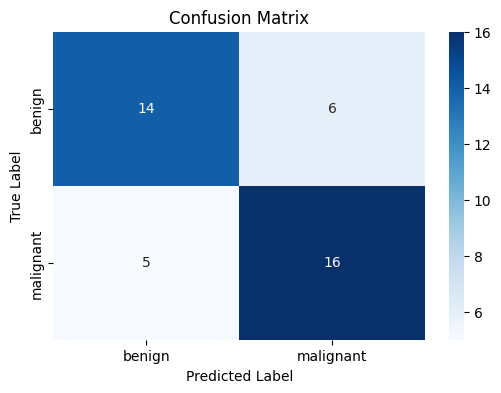

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

pred_probs = Model_CNN1.predict(X_val)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

true_labels = y_val.flatten()

print(classification_report(true_labels, pred_labels, target_names=class_labels))

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Visualize CNN FINE TUNED Training Progress

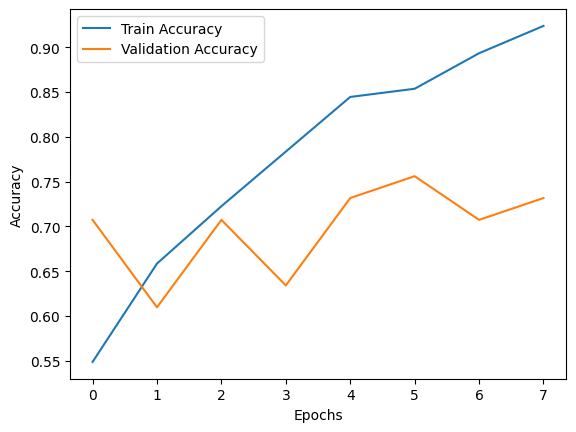

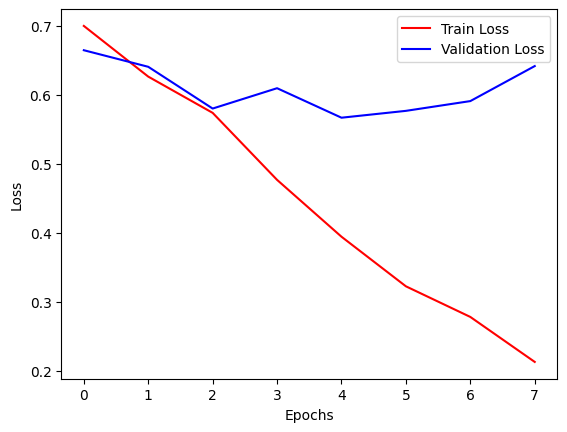

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history_cnn_ft.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn_ft.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history_cnn_ft.history['loss'], label='Train Loss', color='red')
plt.plot(history_cnn_ft.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
Model_CNN1.save("CNNModelFineTuned.h5")  # Saves as an HDF5 file

Evaluate VGG16 FINE TUNED Model

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
              precision    recall  f1-score   support

      benign       0.85      0.85      0.85        20
   malignant       0.86      0.86      0.86        21

    accuracy                           0.85        41
   macro avg       0.85      0.85      0.85        41
weighted avg       0.85      0.85      0.85        41



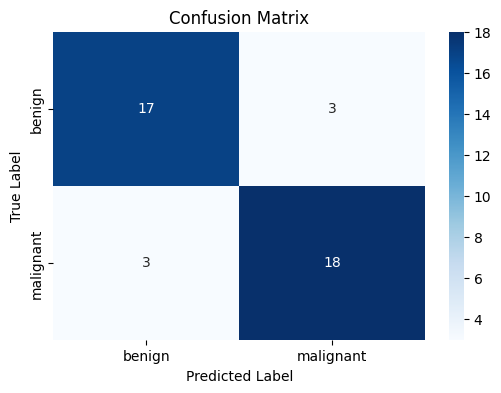

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

pred_probs = Model_VGG16.predict(X_val)
pred_labels = (pred_probs > 0.5).astype(int).flatten()  # for binary classification

true_labels = y_val.flatten()

print(classification_report(true_labels, pred_labels, target_names=class_labels))

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Visualize VGG16 FINE TUNED Training Progress

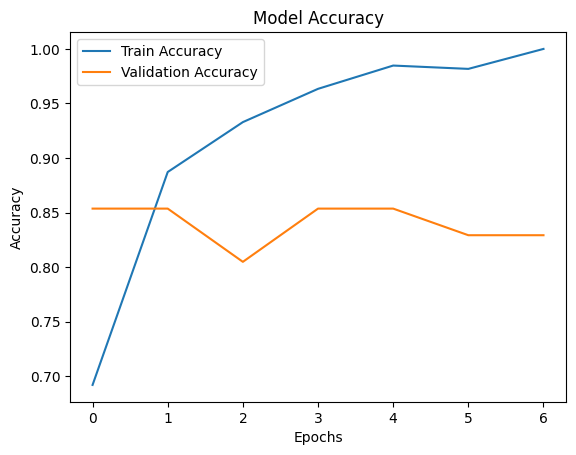

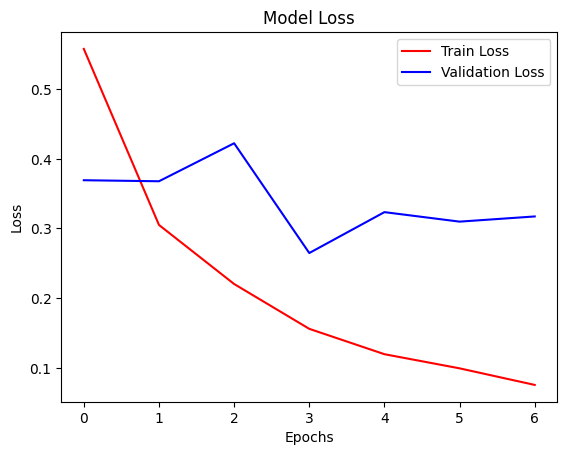

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_vgg16_ft.history['accuracy'], label='Train Accuracy')
plt.plot(history_vgg16_ft.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history_vgg16_ft.history['loss'], label='Train Loss', color='red')
plt.plot(history_vgg16_ft.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [ ]:
Model_VGG16.save("VGG16FineTuned.keras")

***evaluate ResNet***

1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 4s/step


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      benign       0.49      1.00      0.66        20
   malignant       0.00      0.00      0.00        21

    accuracy                           0.49        41
   macro avg       0.24      0.50      0.33        41
weighted avg       0.24      0.49      0.32        41



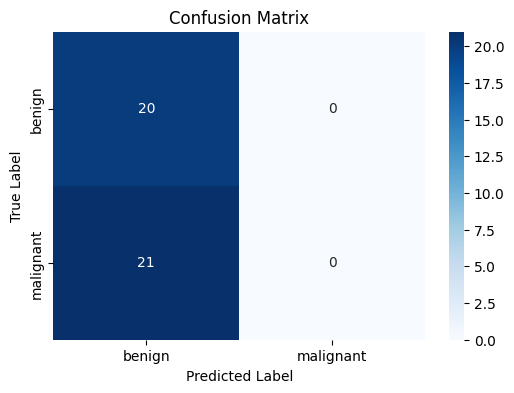

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

pred_probs = Model_ResNet50.predict(X_val)
pred_labels = (pred_probs > 0.5).astype(int).flatten()

true_labels = y_val.flatten()

print(classification_report(true_labels, pred_labels, target_names=class_labels))

cm = confusion_matrix(true_labels, pred_labels)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


Visualize ResNet Training Progress

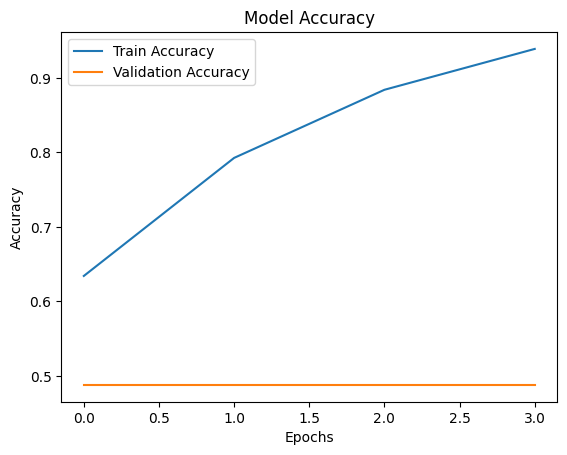

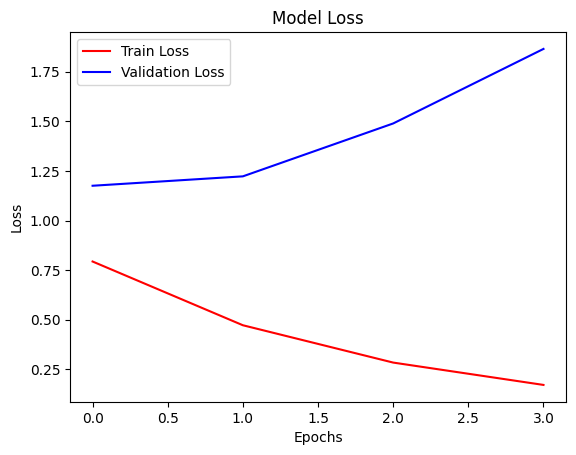

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_resnet_ft.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet_ft.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.plot(history_resnet_ft.history['loss'], label='Train Loss', color='red')
plt.plot(history_resnet_ft.history['val_loss'], label='Validation Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


In [ ]:
Model_ResNet50.save("RESNET50FineTuned.keras")

# ***Chapter 9: Analysis of Variance***

Statistikos elegxos

In [ ]:
from scipy.stats import f_oneway

# Accuracy από κάθε μοντέλο (τυχαία νούμερα εδώ)
cnn_accuracies = [0.8060 , 0.9104 , 0.9697]
vgg_accuracies = [0.6269 , 0.6716 , 0.7424]
resnet_accuracies = [0.8029 , 0.8029 , 0.8309]

# ANOVA
f_stat, p_value = f_oneway(cnn_accuracies, vgg_accuracies, resnet_accuracies)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 10.060441750147154
p-value: 0.012119652409643801
